# Random Forest - Predicting hotel booking cancellation

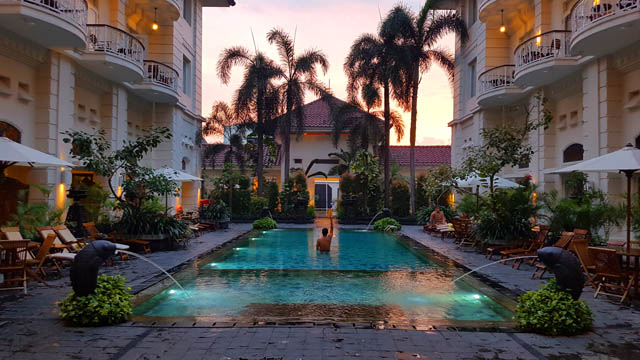

## Introduction

Losing a customer sucks. Especially so when you're a hotelier during these pandemic times. But leverage the power of data science well and you might be able to turn the corner by levelling up your game.

That is, you want to understand your customers - see what kind of people are likely to follow through with their reservations. Knowing this can be very helpful in terms of deciding what customer range to target and where to invest, thereby saving money and increasing efficiency.

Here in this project I walk through the steps of predictive modeling using Random Forest to explain and predict hotel booking cancellation.

## The Dataset & Data Preprocessing

The dataset can be found here: https://www.kaggle.com/jessemostipak/hotel-booking-demand

It is a dataset of actual hotel booking logs involving 100,000+ cases between 2015 and 2017.

In [1]:
import pandas as pd
hotel = pd.read_csv("/Users/Jun/Desktop/hotel_bookings.csv") # loading the dataset
hotel.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [2]:
colnames = ["hotel", "is_canceled", "lead_time", "arrival_date_year", "arrival_date_month", "arrival_date_week_number", "arrival_date_day_of_month", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", "meal", "country", "market_segment", "distribution_channel", "is_repeated_guest", "previous_bookings_not_canceled", "reserved_room_type", "assigned_room_type", "booking_changes", "deposit_type", "agent", "company", "days_in_waiting_list", "customer_type", "adr", "required_car_parking_spaces", "total_of_special_requests", "reservation_status", "reservation_status_date"]
explanation = ["Hotel (H1 = Resort Hotel or H2 = City Hotel)", "Value indicating if the booking was canceled (1) or not (0)", "Number of days that elapsed between the entering date of the booking into the PMS and the arrival date", "Year of arrival date", "Month of arrival date", "Week number of year for arrival date", "Day of arrival date", "Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel", "Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel", "Number of adults", "Number of children.", "Number of babies", "Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)",
"Country of origin. Categories are represented in the ISO 3155–3:2013 format", "Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”", "Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”", "Value indicating if the booking name was from a repeated guest (1) or not (0)", "Number of previous bookings not cancelled by the customer prior to the current booking", "Code of room type reserved. Code is presented instead of designation for anonymity reasons.", "Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.",
"Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation", "Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.", "ID of the travel agency that made the booking", "ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons", "Number of days the booking was in the waiting list before it was confirmed to the customer", "Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking",
"Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights", "Number of car parking spaces required by the customer", "Number of special requests made by the customer (e.g. twin bed or high floor)", "Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why", "Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel"]
d = {"Column Name": colnames, "Description": explanation}
table = pd.DataFrame(data = d)
pd.set_option('display.max_colwidth', 450)
table

,Column Name,Description
0,hotel,Hotel (H1 = Resort Hotel or H2 = City Hotel)
1,is_canceled,Value indicating if the booking was canceled (1) or not (0)
2,lead_time,Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
3,arrival_date_year,Year of arrival date
4,arrival_date_month,Month of arrival date
5,arrival_date_week_number,Week number of year for arrival date
6,arrival_date_day_of_month,Day of arrival date
7,stays_in_weekend_nights,Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
8,stays_in_week_nights,Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
9,adults,Number of adults


The following features will not be in use, as they're completely meaningless: arrival_date_year, arrival_date_week_number, arrival_date_of_month, country, reservation_status, reservation_status_date.

In [3]:
hotel.drop(["arrival_date_year", "arrival_date_week_number", "arrival_date_day_of_month", "country", "agent", "company", "reservation_status", "reservation_status_date"], axis = 1, inplace = True)
hotel.head(5)

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,July,0,0,2,0.0,0,BB,...,0,C,C,3,No Deposit,0,Transient,0.0,0,0
1,Resort Hotel,0,737,July,0,0,2,0.0,0,BB,...,0,C,C,4,No Deposit,0,Transient,0.0,0,0
2,Resort Hotel,0,7,July,0,1,1,0.0,0,BB,...,0,A,C,0,No Deposit,0,Transient,75.0,0,0
3,Resort Hotel,0,13,July,0,1,1,0.0,0,BB,...,0,A,A,0,No Deposit,0,Transient,75.0,0,0
4,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,...,0,A,A,0,No Deposit,0,Transient,98.0,0,1


Checking for duplicates & missing values,

In [4]:
# number of duplicated rows
sum(hotel.duplicated())

34547

Here we have a problem. The dataset has around 35,000 observations that match some other observation in every feature. Duplicates can severly bias a model, so they might as well be removed. It turns out the number of duplicates were still 30,000+ even before dropping some columns, to further justify.

In [5]:
# drop duplicates
hotel.drop_duplicates(inplace = True)

In [6]:
# number of missing values for each column
hotel.apply(lambda x: sum(x.isnull()), axis = 0)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

Now here's another problem. The 'children' column has 4 missing values. 

In [7]:
hotel[hotel["children"].isnull() == True]

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
40600,City Hotel,1,2,August,1,0,2,NaN,0,BB,...,0,B,B,0,No Deposit,0,Transient-Party,12.0,0,1
40667,City Hotel,1,1,August,0,2,2,NaN,0,BB,...,0,B,B,0,No Deposit,0,Transient-Party,12.0,0,1
40679,City Hotel,1,1,August,0,2,3,NaN,0,BB,...,0,B,B,0,No Deposit,0,Transient-Party,18.0,0,2
41160,City Hotel,1,8,August,2,5,2,NaN,0,BB,...,0,B,B,0,No Deposit,0,Transient-Party,76.5,0,1


We're looking at the case of MAR(Missing at Random). This basically means that observations of interest are very similar to each other. In this case they all share the same value for 'hotel', 'is_canceled', 'arrival_date_month', 'adults', 'babies', 'meal', and many more.
A common way to deal with this situation is imputation by mean/median/mode. In this case imputation by mode is reasonable.

In [8]:
hotel.loc[hotel["is_canceled"] == 1, "children"].value_counts()
# 0 is the most common value for 'children'

0.0     20685
2.0      1497
1.0      1457
3.0        16
10.0        1
Name: children, dtype: int64

In [9]:
hotel.loc[hotel["children"].isnull() == True, "children"] = 0
hotel.loc[[40600, 40667, 40679, 41160], :]

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
40600,City Hotel,1,2,August,1,0,2,0.0,0,BB,...,0,B,B,0,No Deposit,0,Transient-Party,12.0,0,1
40667,City Hotel,1,1,August,0,2,2,0.0,0,BB,...,0,B,B,0,No Deposit,0,Transient-Party,12.0,0,1
40679,City Hotel,1,1,August,0,2,3,0.0,0,BB,...,0,B,B,0,No Deposit,0,Transient-Party,18.0,0,2
41160,City Hotel,1,8,August,2,5,2,0.0,0,BB,...,0,B,B,0,No Deposit,0,Transient-Party,76.5,0,1


Lastly, looking at the summary statistics for each quantitative variable:

In [10]:
hotel.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,84843.000000,84843.000000,84843.000000,84843.000000,84843.00000,84843.000000,84843.000000,84843.000000,84843.000000,84843.000000,84843.000000,84843.000000,84843.000000,84843.000000,84843.000000
mean,0.278868,79.611954,1.013684,2.643094,1.88296,0.142180,0.011115,0.039933,0.031046,0.189255,0.272692,0.671369,106.838549,0.086348,0.707271
std,0.448445,85.459312,1.034705,2.063122,0.62777,0.461117,0.115127,0.195802,0.374266,1.757277,0.732005,9.483117,55.372607,0.284754,0.834702
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,0.000000,1.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,49.000000,1.000000,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,0.000000,1.000000
75%,1.000000,125.000000,2.000000,4.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.000000,0.000000,1.000000
max,1.000000,737.000000,19.000000,50.000000,55.00000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


While some cases do look a bit fishy (such as 19 weekend nights & 50 week nights / 0 or negative average daily rate), there's not enough evidence to suggest that they are faulty. It  might have been that, some customers had two separate periods of lodging (which explains the former) and some others were compensated for something the hotel was responsible for (such as room type change by the hotel). Ideally a further investigation could be helpful, but that is not possible and the decision is to just move on.

Apart from that the dataset is good to go.

In [11]:
hotel.to_csv("/Users/Jun/Desktop/something.csv")

## Training a model

First separate the dependent variable from the independent variables.

In [12]:
Y = hotel.iloc[:, 1].values
X = hotel.loc[:, hotel.columns != "is_canceled"]

In theory, Random Forest does not require converting categorical variables. However, the .fit() method later on does not accept strings and therefore encoding has to be done.

In [13]:
from sklearn.preprocessing import LabelEncoder
new = X.loc[:, ["hotel", "arrival_date_month", "meal", "market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type"]].apply(LabelEncoder().fit_transform)
X.loc[:, ["hotel", "arrival_date_month", "meal", "market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type"]] = new
X = X.values

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Now preparing the training set and the test set,

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

Feature scaling is not needed. Below code lines train a model with 100 trees:

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

## Model Evaluation

Now that a model has been trained, it's time to test it out. The results are below:

In [16]:
Y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
testset_score = accuracy_score(Y_test, Y_pred)
print("Train set accuracy score: {:.3f}".format(model.score(X_train, Y_train)))
print("Test set accuracy score: {:.3f}".format(testset_score))

Train set accuracy score: 0.995
Test set accuracy score: 0.801


The train set score of 0.995 is rather a stark contrast from the test set score of 0.801. This speaks overfitting - that is, the model followed the training set far too closely.

A common method of dealing with overfitting in RF is pre-pruning, which can come in several different forms. One of them is limiting the minimum required number of samples for each leaf, and by default that is set to 1. 

Increasing this limit should lessen overfitting. Here's the result of setting the result to 4:

In [17]:
model = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 4, random_state = 42)
model.fit(X_train, Y_train)
print("Train set accuracy score: {:.3f}".format(model.score(X_train, Y_train)))
print("Test set accuracy score: {:.3f}".format(model.score(X_test, Y_test)))

Train set accuracy score: 0.850
Test set accuracy score: 0.810


The gap has narrowed, and the test set accuracy increased by 1%. As far as adjusting the min_samples_leaf parametre goes this is the optimal point. As for the confusion matrix,

In [18]:
Y_pred = model.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[14278,  1059],
       [ 2980,  2894]])

From above the following metrics can be calculated:

Accuracy: (14278+2894)/(14278+1059+2980+2894) = 0.810

Positive Predictive Value = Precision: 2894/(1059+2894) = 0.732

Negative Predictive Value: 14278/(14278+2980) = 0.827

That is, the probability of 'not cancelled' being truthful is 0.827; 'cancelled', 0.732.

A more rigorous way to test the model is through what is called cross validation. The idea is to split the dataset into K folds, each of which is treated as the test set exactly once over the course of K iterations. The metrics averaged across those iterations should be the more reliable and accurate ones compared to the numbers above.

In [19]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
fold = KFold(n_splits = 5, shuffle = True, random_state = 42)
model = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 4, random_state = 42)
accuracy = cross_validate(model, X=X, y=Y, scoring = 'accuracy', cv = fold)
ppv = cross_validate(model, X=X, y=Y, scoring = 'precision', cv = fold)
npv = cross_validate(model, X=X, y=np.array(Y==0, int), scoring = 'precision', cv = fold)
print("5-fold cross-validation accuracy score: {:.3f}".format(np.mean(accuracy["test_score"])))
print("5-fold cross-validation PPV score: {:.3f}".format(np.mean(ppv["test_score"])))
print("5-fold cross-validation NPV score: {:.3f}".format(np.mean(npv["test_score"])))

5-fold cross-validation accuracy score: 0.811
5-fold cross-validation PPV score: 0.738
5-fold cross-validation NPV score: 0.828


## Conclusion

From above it can be concluded that, with the RF classifier model above, one can confidently expect an accuracy level of 81% in future predictions, with 74% accuracy in positive predictions and 83% in negative ones. 

That is, there is roughly 26% chance that a customer predicted to cancel actually follows-through, and roughly 17% chance that a customer predicted to follow-through ends up cancelling.

Below horizontal bar graph shows which features were the most pivotal ones for the model:

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (7, 7))
model.fit(X_train, Y_train)
features = pd.Series(model.feature_importances_, index=hotel.drop("is_canceled", axis = 1).columns)
features.plot(kind='barh')
plt.xlabel("Feature Importance")
plt.ylabel("Features")

Text(0, 0.5, 'Features')

Every feature takes on a value between 0 and 1, with 0 meaning the feature was not used at all and 1 meaning the feature alone can perfectly predict every training set observation. The sum of the figures is always equal to 1.

Here 'lead_time' leads by landslide, follwed by 'adr', 'total_of_special_requests', 'market_segment', 'required_car_parking_spaces', 'arrival_date_month', in that order. Specifically how each of these affect cancellation status is untold by the model, but the following graphs provide some insight:

(-25, 600)

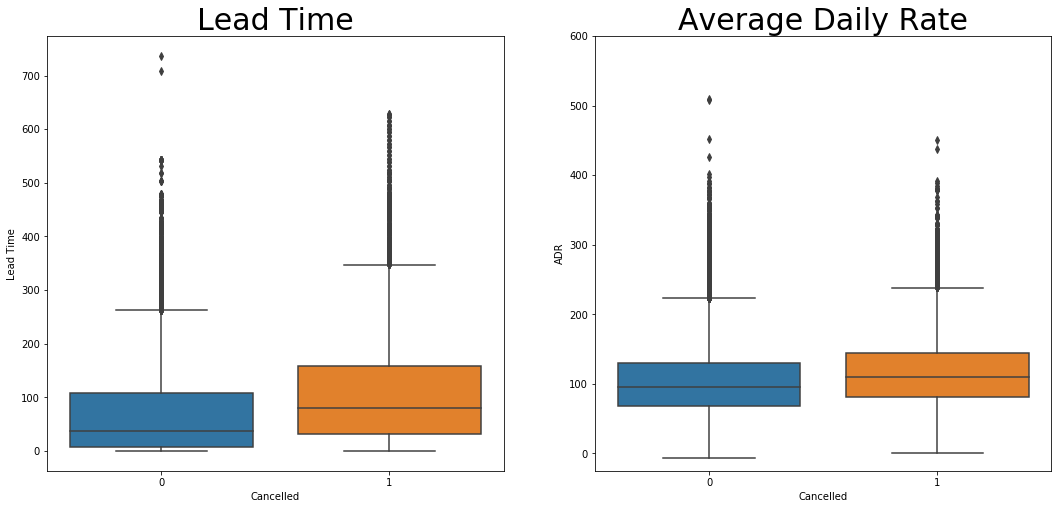

In [21]:
import seaborn as sns
fig = plt.figure(figsize = (18, 8))

d = {}
d["ax0"] = fig.add_subplot(1, 2, 1)
lt = pd.DataFrame({"Cancelled": hotel["is_canceled"], "Lead Time": hotel["lead_time"]})
d["ax0"] = sns.boxplot(x = "Cancelled", y = "Lead Time", data = lt)
d["ax0"].set_title("Lead Time", size = 30)

d["ax1"] = fig.add_subplot(1, 2, 2)
adr = pd.DataFrame({"Cancelled": hotel["is_canceled"], "ADR": hotel["adr"]})
d["ax1"] = sns.boxplot(x = "Cancelled", y = "ADR", data = adr)
d["ax1"].set_title("Average Daily Rate", size = 30)
d["ax1"].set_ylim([-25, 600])

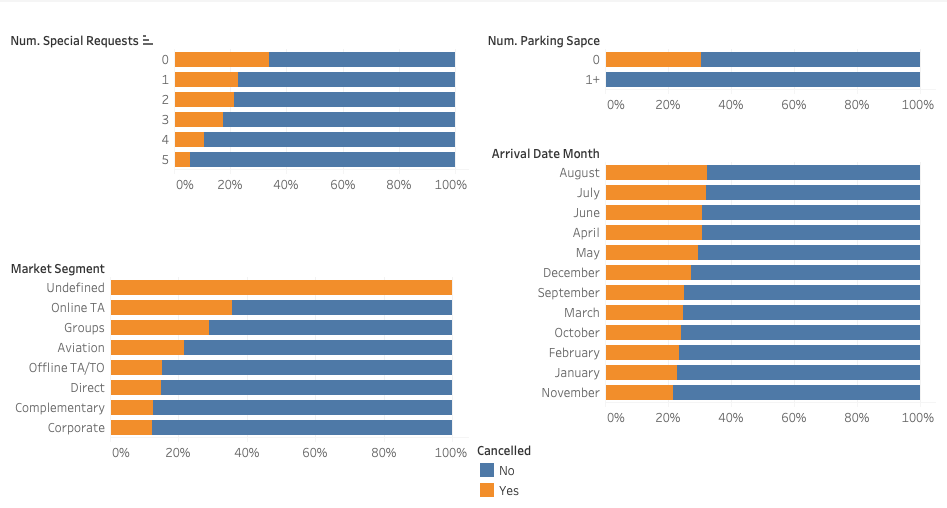

In general,

**Customers are more likely to cancel when they**
- have a lot of lead time (time between reservation and scheduled arrival date)
- have high average daily rate
- have no special requests
- do not require a car parking space
- reserve through an online travel agency or an 'undefined route'
- are summer guests

**Customers are more likely to retain when they**
- have a short length of lead time
- have low average daily rate
- have special requests (the more the better)
- claim a car parking space
- come from a corporate market segment
- are winter guests (save for December)